# ANOVA

## F-Distribution

1. **Continuous probability distribution**: The F-distribution is a continuous
probability distribution used in statistical hypothesis testing and
analysis of variance (ANOVA).

2. **Fisher-Snedecor distribution**: It is also known as the Fisher-Snedecor
distribution, named after Ronald Fisher and George Snedecor, two
prominent statisticians.

3. **Degrees of freedom**: The F-distribution is defined by two parameters -
the degrees of freedom for the numerator (df1) and the degrees of
freedom for the denominator (df2).

4. **Positively skewed and bounded**: The shape of the F-distribution is
positively skewed, with its left bound at zero. The distribution's shape
depends on the values of the degrees of freedom.

5. **Testing equality of variances**: The F-distribution is commonly used to
test hypotheses about the equality of two variances in different
samples or populations.

6. **Comparing statistical models**: The F-distribution is also used to compare
the fit of different statistical models, particularly in the context of
ANOVA.

7.  **F-statistic**: The F-statistic is calculated by dividing the ratio of two
sample variances or mean squares from an ANOVA table. This value is
then compared to critical values from the F-distribution to determine
statistical significance.

8. **Applications**: The F-distribution is widely used in various fields of
research, including psychology, education, economics, and the natural
and social sciences. for hvoothesis testine and model comparison.

### 🔗 Relationship Between F-Distribution and Chi-Square

If:
- $X_1 \sim \chi^2_{d_1}$ (a chi-square random variable with $d_1$ degrees of freedom),
- $X_2 \sim \chi^2_{d_2}$ (another independent chi-square variable with $d_2$ degrees of freedom),

Then the **F-distributed** variable is formed as:

$$
F = \frac{(\chi^2_{d_1} / d_1)}{(\chi^2_{d_1} / d_2)} \sim F_{d_1, d_2}
$$

This means the F-distribution is the **ratio of two independent chi-square variables**, each divided by its respective degrees of freedom.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Density'>

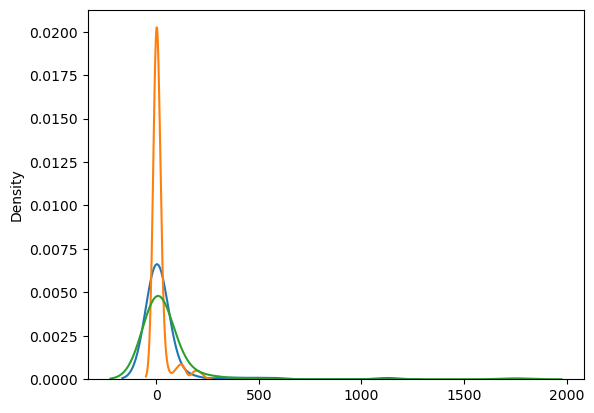

In [104]:
# using normal for chi2 and then f distribution
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x3 = np.random.normal(0, 1, 100)
x4 = np.random.normal(0, 1, 100)

y1 = ((x1**2) / 1 )/ ((x2**2) / 1)
y2 = ((x1**2 + x3**2) / 2 )/ ((x4**2) / 1)
y3 = ((x1**2 + x3**2 + x2**2) / 2 )/ ((x4**2) / 1)
sns.kdeplot(y1)
sns.kdeplot(y2)
sns.kdeplot(y3)

<Axes: ylabel='Density'>

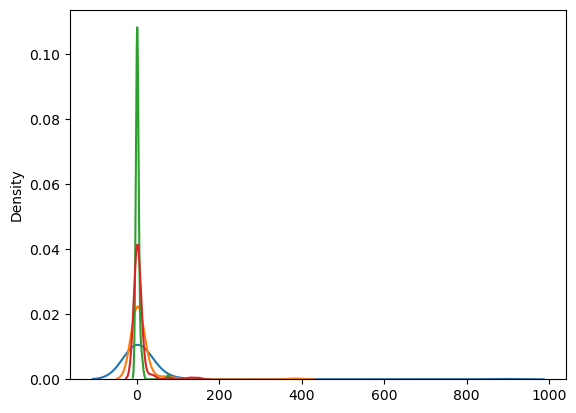

In [93]:


x = np.random.chisquare(1, 100)
x0 = np.random.chisquare(1, 100)
x1 = np.random.chisquare(2, 100)
x2 = np.random.chisquare(3, 100)
x3 = np.random.chisquare(4, 100)
x4 = np.random.chisquare(5, 100)

y0 = (x / 1 )/ (x0 / 1)
y1 = (x1 / 2 )/ (x0 / 1)
y2 = (x3 / 4 )/ (x2 / 3)
y3 = (x4 / 5 )/ (x1 / 2)
sns.kdeplot(y0)
sns.kdeplot(y1)
sns.kdeplot(y2)
sns.kdeplot(y3)

## One way ANOVA test


One-way ANOVA (Analysis of Variance) is a statistical method used to compare the means of
three or more independent groups to determine if there are any significant differences
between them. It is an extension of the t-test, which is used for comparing the means of two
independent groups. The term "one-way" refers to the fact that there is only one independent
variable (factor) with multiple levels (groups) in this analysis.

The primary purpose of one-way ANOVA is to test the null hypothesis that all the group means
are equal. The alternative hypothesis is that at least one group mean is significantly different
from the others.

Steps:

* Define the null and alternative hypotheses.

* Calculate the overall mean (grand mean) of all the groups combined and mean of all the
groups individually.

* Calculate the "between-group" and "within-group" sum of squares (SS).

* Find the between group and within group degree of freedoms

* Calculate the "between-group" and "within-group" mean squares (MS) by dividing their
respective sum of squares by their degrees of freedom.

* Calculate the F-statistic by dividing the "between-group" mean square by the "within-
group" mean square.


### Assumptions

1. **Independence**: The observations within and between groups should be independent of
each gther. This means that the outcome of one observation should not influence the
outcome of another. Independence is typically achieved through random sampling or
random assignment of subjects to groups.

2. **Normality**: The data within each group should be approximately normally distributed.
While one-way ANOVA is considered to be robust to moderate violations of normality,
severe deviations may affect the accuracy of the test results. If normality is in doubt, non-
parametric alternatives like the Shapiro-wilk test can be considered.

3. **Homogeneity of variances**: The variances of the populations from which the samples are
drawn should be equal, or at least approximately so. This assumption is known as
homoscedasticity. If the variances are substantially different, the accuracy of the test
results may be compromised. Levene's test or Bartlett's test can be used to assess the
homogeneity of variances. If this assumption is violated, alternative tests such as Welch's
ANOVA can be used.


In [146]:
## que 
# in titanic dataset, we have to check if pclass has same mean ages or not
titanic = sns.load_dataset('titanic')
titanic = titanic[titanic.age.notna()]
titanic = titanic[titanic.pclass.isin([1, 2, 3])]

In [137]:
pd.DataFrame({i: titanic[titanic.pclass == i]['age'].reset_index(drop=True) for i in titanic.pclass}).to_csv('x.csv')

USING SCIPY

In [143]:
titanic = sns.load_dataset('titanic').dropna(subset=['age'])

# Split age data by pclass
group1 = titanic[titanic.pclass == 1]['age']
group2 = titanic[titanic.pclass == 2]['age']
group3 = titanic[titanic.pclass == 3]['age']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 57.443484340676214
p-value: 7.487984171959904e-24


Using statsmodels

In [144]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('age ~ C(pclass)', data=titanic).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(pclass),20929.627754,2.0,57.443484,7.487984e-24
Residual,129527.008190,711.0,NaN,NaN


Manually

In [160]:
groups = [group['age'].values for name, group in titanic.groupby('pclass')]
np.array(groups[0]).shape, np.array(groups[1]).shape, np.array(groups[2]).shape

((186,), (173,), (355,))

In [162]:
grand_mean = titanic['age'].mean()
grand_mean

np.float64(29.69911764705882)

### 🔹1. **SSB (Sum of Squares Between Groups)**:
Measures the variation **between the group means and the overall mean**.
$$
SSB = \sum_{i=1}^{k} n_i (\bar{x}_i - \bar{x})^2
$$
- $n_i$: number of observations in group *i*
- $\bar{x}_i$: mean of group *i*
- $\bar{x}$: overall mean
- $k$: number of groups

In [188]:
# SS Between
ssb = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
ssb

np.float64(20929.627754282512)

### 🔹2. **SSW (Sum of Squares Within Groups)**:
Measures the variation **within each group**, i.e., how spread out the values are **inside each group**.
$$
SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2
$$
- $x_{ij}$: j-th observation in group *i*

In [ ]:
## SS within
ssw = sum(sum((i - np.mean(g))**2 for i in g) for g in groups)

np.float64(129527.00818983512)

In [ ]:
# k = number of groups
# n = total number of observations
k = titanic.pclass.unique().shape[0]
n = titanic.pclass.shape[0]

714

### 🔹3. 
| Source         | DF             |
| -------------- | -------------- |
| Between Groups | $df_b = k - 1$ |
| Within Groups  | $df_w = n - k$ |
| Total          | $df_t = n - 1$ |


In [200]:
df_b = k - 1
df_w = n - k
df_t = n - 1
print(df_b,", ", df_w,", ", df_t)

2 ,  711 ,  713


### 🔹4. Mean Squares

$$
\text{MSB} = \frac{\text{SSB}}{df_b}
$$
$$
\text{MSW} = \frac{\text{SSW}}{df_w}
$$
$$
F = \frac{MSB}{MSW}
$$

In [225]:
msb = ssb/df_b
msw = ssw/df_w
f_stat = msb/msw
f_stat, msb, msw

(np.float64(57.44348434067621),
 np.float64(10464.813877141256),
 np.float64(182.17582023886797))

In [224]:
p_value = stats.f.sf(f_stat, df_b, df_w)
print(p_value)

7.487984171959904e-24


### Post hoc tests

Post hoc tests, also known as post hoc pairwise comparisons or multiple comparison tests, are
used in the context of ANOVA when the overall test indicates a significant difference among
the group means. These tests are performed after the initial one-way ANOVA to determine
which specific groups or pairs of groups have significantly different means.

The main purpose of post hoc tests is to control the family-wise error rate (FWER) and adjust
the significance level for multiple comparisons to avoid inflated Type | errors. There are
several post hoc tests available, each with different characteristics and assumptions. Some
common post hoc tests include:

1. **Bonferroni correction**: This method adjusts the significance level ($\alpha$) by dividing it by the
number of comparisons being made. It is a conservative method that can be applied when
making multiple comparisons, but it may have lower statistical power when a large number of comparisons are involved.

2. **Tukey's HSD (Honestly Significant Difference) test**: This test controls the FWER and is used
when the sample sizes are equal and the variances are assumed to be equal across the
groups. It is one of the most commonly used post hoc tests.

When performing post hoc tests, it is essential to choose a test that aligns with the
assumptions of your data (e.g., equal variances, equal sample sizes) and provides an
appropriate balance between controlling Type | errors and maintaining statistical power.


### 🎯 What is the Bonferroni Correction?

The **Bonferroni correction** is a method to **control false positives** when you're doing **multiple statistical tests** at the same time.

It helps prevent you from **mistakenly thinking something is significant when it’s actually just random**.



#### 🧠 Why Do We Need It?

Suppose you run **1 hypothesis test** with a significance level of 0.05 — there’s a 5% chance you might wrongly reject the null hypothesis (i.e., get a false positive).

But if you do **20 tests**, your chance of getting **at least one false positive** is **much higher than 5%** — in fact, it can be up to:

$$
1 - (1 - 0.05)^{20} \approx 64\%
$$

That’s bad science! We need to **adjust** for this.



#### ✅ How Bonferroni Fixes It

It says:

> If you're doing $m$ tests, then make your new significance level:
> $$
> \alpha_{\text{new}} = \frac{\alpha}{m}
> $$

So instead of using **0.05** for each test, you'd use a smaller threshold:
- For 5 tests: $\frac{0.05}{5} = 0.01$
- For 10 tests: $\frac{0.05}{10} = 0.005$

This makes it **harder to claim significance**, which **reduces false positives**.



#### 📊 Example

Imagine testing **5 drugs** to see if any lower blood pressure. For each, you do a hypothesis test.

Without correction:
- You test each at $\alpha = 0.05$
- If **any one** p-value < 0.05, you call it significant

But you're more likely to find something just by **chance**.

##### Using Bonferroni:
- New threshold = $0.05 / 5 = 0.01$
- Now, a result must have **p < 0.01** to be considered significant



#### 🔢 Bonferroni-Corrected p-values

You can also **adjust p-values instead of alpha**:

$$
p_{\text{adjusted}} = p \times m
$$

Then compare this to your original α (e.g., 0.05).


#### ✅ Summary

| Concept              | Meaning                          |
|----------------------|----------------------------------|
| When to use?         | Doing **multiple hypothesis tests** |
| Why?                 | Avoid too many false positives   |
| What it does         | Lowers the threshold for p-values |
| New alpha            | $\alpha / \text{number of tests}$ |
| Conservative?        | Yes — can reduce false positives but **increase false negatives** |



In [ ]:
alpha = 0.05
k = titanic.pclass.unique().tolist()
combs = [(i, j) for idx, i in enumerate(k) for j in k[idx+1:]]
print(combs, "\n", len(combs))

[(3, 1), (3, 2), (1, 2)] 
 3


In [ ]:
new_alpha = 0.05/len(combs)
new_alpha

0.016666666666666666

In [280]:
# lets check who is culprit if anova test get H0: rejected
from scipy import stats
for class1, class2 in combs:
    print(class1, ',',class2, '--->',stats.ttest_ind(titanic[titanic.pclass == class1]['age'], titanic[titanic.pclass == class2]['age']).pvalue)

3 , 1 ---> 6.134470007830625e-25
3 , 2 ---> 9.715078600777851e-05
1 , 2 ---> 7.835568991415144e-08


pclass=1 is culprit, because it making p-value more less

In [281]:
titanic[titanic.pclass == 1]['age'].mean(), titanic[titanic.pclass == 2]['age'].mean(), titanic[titanic.pclass == 3]['age'].mean()

(np.float64(38.233440860215055),
 np.float64(29.87763005780347),
 np.float64(25.14061971830986))

because its mean is significantly higher than others.

#### **Family-Wise Error Rate (FWER)**


* **FWER** stands for **Family-Wise Error Rate**.
* It is the **probability of making at least one Type I error** (false positive) among a **family of multiple comparisons**.



##### Formula for FWER:

If you perform $m$ **independent** hypothesis tests, each at significance level $\alpha$, the FWER is approximately:

$$
\text{FWER} = 1 - (1 - \alpha)^m
$$

This assumes tests are **independent** (which is a simplification — in practice, they're often correlated).



##### 🧠 Example:

* $\alpha = 0.05$
* $m = 20$ tests

Then:

$$
\text{FWER} = 1 - (1 - 0.05)^{20} = 1 - (0.95)^{20} \approx 0.64
$$

So, even though each test has only a 5% chance of a false positive, doing 20 tests means you have a **64% chance of at least one false positive** across the set.



##### 🎯 Why Use Bonferroni?

To **control the FWER** at 5%, Bonferroni correction lowers the per-test α:

$$
\alpha_{\text{corrected}} = \frac{0.05}{m}
$$

That way:

$$
\text{FWER} \leq m \cdot \alpha_{\text{corrected}} = 0.05
$$


##### ✅ Summary

| Concept               | Meaning                                       |
| --------------------- | --------------------------------------------- |
| FWER                  | Chance of ≥1 false positive in multiple tests |
| Formula               | $1 - (1 - \alpha)^m$                          |
| For 20 tests @ $\alpha$=0.05 | FWER ≈ 64%                                    |
| Bonferroni correction | Reduces per-test α to keep FWER ≤ 0.05        |



### **Tukey's HSD (Honestly Significant Difference) test**

**Tukey's HSD (Honestly Significant Difference) test** is a **post-hoc** statistical test used after an **ANOVA** (Analysis of Variance) to determine **which specific group means are significantly different** from each other.

#### When to Use Tukey's HSD:

* You’ve conducted a **one-way ANOVA** and found a **significant F-statistic**, indicating that at least one group mean is different.
* You want to **compare all possible pairs of group means** to identify where the differences lie.
* You want to **control the Type I error rate** when making multiple comparisons.



#### Key Concepts:

* **Purpose**: Compare all pairs of group means while maintaining the overall confidence level (usually 95%).
* **Assumes**:

  * Independent samples
  * Normal distribution within each group
  * Homogeneity of variances (equal variances across groups)



#### Formula:

$$
\text{HSD} = q_{\alpha}(k, df_{\text{within}}) \cdot \sqrt{\frac{MS_{\text{within}}}{n}}
$$

Where:

* $q_{\alpha}(k, df_{\text{within}})$ = critical value from the **studentized range distribution** (based on number of groups $k$ and degrees of freedom)
* $MS_{\text{within}}$ = mean square within (from ANOVA)
* $n$ = sample size per group (assumed equal for this formula)



#### Steps to Perform Tukey's HSD:

1. **Run one-way ANOVA** and check if the F-statistic is significant.
2. **Calculate the HSD value** using the formula or a statistical software.
3. **Compare absolute differences** between each pair of means to the HSD.
4. **Interpret**: If the difference between two means is greater than the HSD, it's considered statistically significant.



#### Example in Python (using `statsmodels`):

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -8.3558    0.0 -11.7041  -5.0075   True
     1      3 -13.0928    0.0 -15.9622 -10.2234   True
     2      3   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------


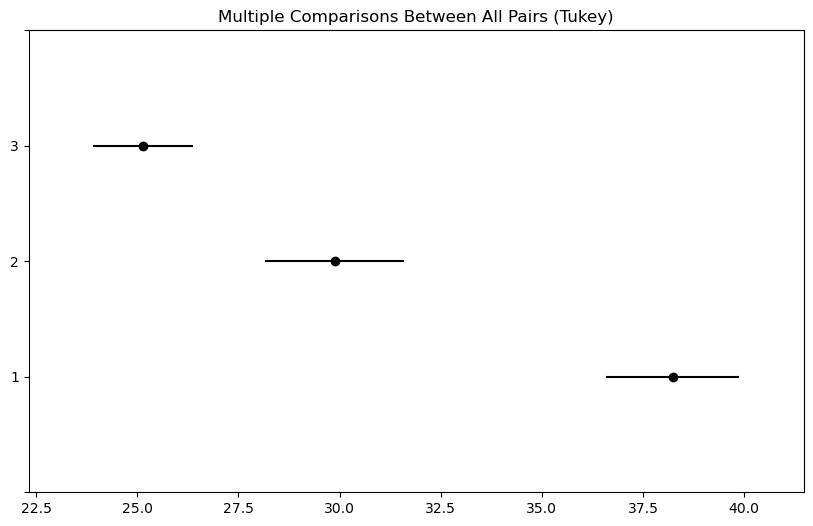

In [287]:
import statsmodels
tukey_result = statsmodels.stats.multicomp.pairwise_tukeyhsd(endog=titanic['age'], groups=titanic['pclass'], alpha=0.05)

# Print result
print(tukey_result.summary())
tukey_result.plot_simultaneous()
plt.show()

This will show which pairs of pclass (Passenger Class) have statistically significant differences in average age

#### Output Interpretation:

The result shows:

* Mean differences between groups
* Confidence intervals
* Whether the difference is statistically significant (True/False)


### Why t-test is not used for more than 3 categories?

1. **Increased Type | error**: When you perform multiple comparisons using individual t-tests,
the probability of making a Type | error (false positive) increases. The more tests you
perform, the higher the chance that you will incorrectly reject the null hypothesis in at least
one of the tests, even if the null hypothesis is true for all groups.

2. **Difficulty in interpreting results**: When comparing multiple groups using multiple t-tests,
the interpretation of the results can become complicated. For example, if you have 4
groups and you perform 6 pairwise t-tests, it can be challenging to interpret and summarize
the overall pattern of differences among the groups.

3. **Inefficiency**: Using multiple t-tests is less efficient than using a single test that accounts for
all groups, such as one-way ANOVA. One-way ANOVA uses the information from all the
groups simultaneously to estimate the variability within and between the groups, which
can lead to more accurate conclusions.


### Applications in Machine Learning

1. **Hyperparameter tuning**: When selecting the best hyperparameters for a machine learning
model, one-way ANOVA can be used to compare the performance of models with different
hyperparameter settings. By treating each hyperparameter setting as a group, you can
perform one-way ANOVA to determine if there are any significant differences in
performance across the various settings.

2. **Feature selection**: One-way ANOVA can be used as a univariate feature selection method to
identify features that are significantly associated with the target variable, especially when
the target variable is categorical with more than two levels. In this context, the one-way
ANOVA is performed for each feature, and features with low p-values are considered to be
more relevant for prediction.

3. **Algorithm comparison**: When comparing the performance of different machine learning
algorithms, one-way ANOVA can be used to determine if there are any significant
differences in their performance metrics (e.g., accuracy, F1 score, etc.) across multiple runs
or cross-validation folds. This can help you decide which algorithm is the most suitable for a
specific problem.

4. **Model stability assessment**: One-way ANOVA can be used to assess the stability of a
machine learning model by comparing its performance across different random seeds or
initializations. If the model's performance varies significantly between different
initializations, it may indicate that the model is unstable or highly sensitive to the choice of
initial conditions.
